In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [47]:
path="./data/ai_job_dataset.csv"

In [48]:
file_id="1DoMpeyjeBQjeOosbHqBWtgT-L82M6499"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

In [49]:
df=pd.read_csv(path)
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### Cleaning Data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [51]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [52]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [53]:
df.drop(['job_id', 'salary_currency', 'required_skills','posting_date','application_deadline', 'job_description_length', 'benefits_score', 'company_name'], axis=1, inplace=True)

In [54]:
df.head()

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,industry
0,AI Research Scientist,90376,SE,CT,China,M,China,50,Bachelor,9,Automotive
1,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,Master,1,Media
2,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,Associate,2,Education
3,NLP Engineer,80215,SE,FL,India,M,India,50,PhD,7,Consulting
4,AI Consultant,54624,EN,PT,France,S,Singapore,100,Master,0,Media


In [55]:
df.columns

Index(['job_title', 'salary_usd', 'experience_level', 'employment_type',
       'company_location', 'company_size', 'employee_residence',
       'remote_ratio', 'education_required', 'years_experience', 'industry'],
      dtype='object')

### Visualizing Data

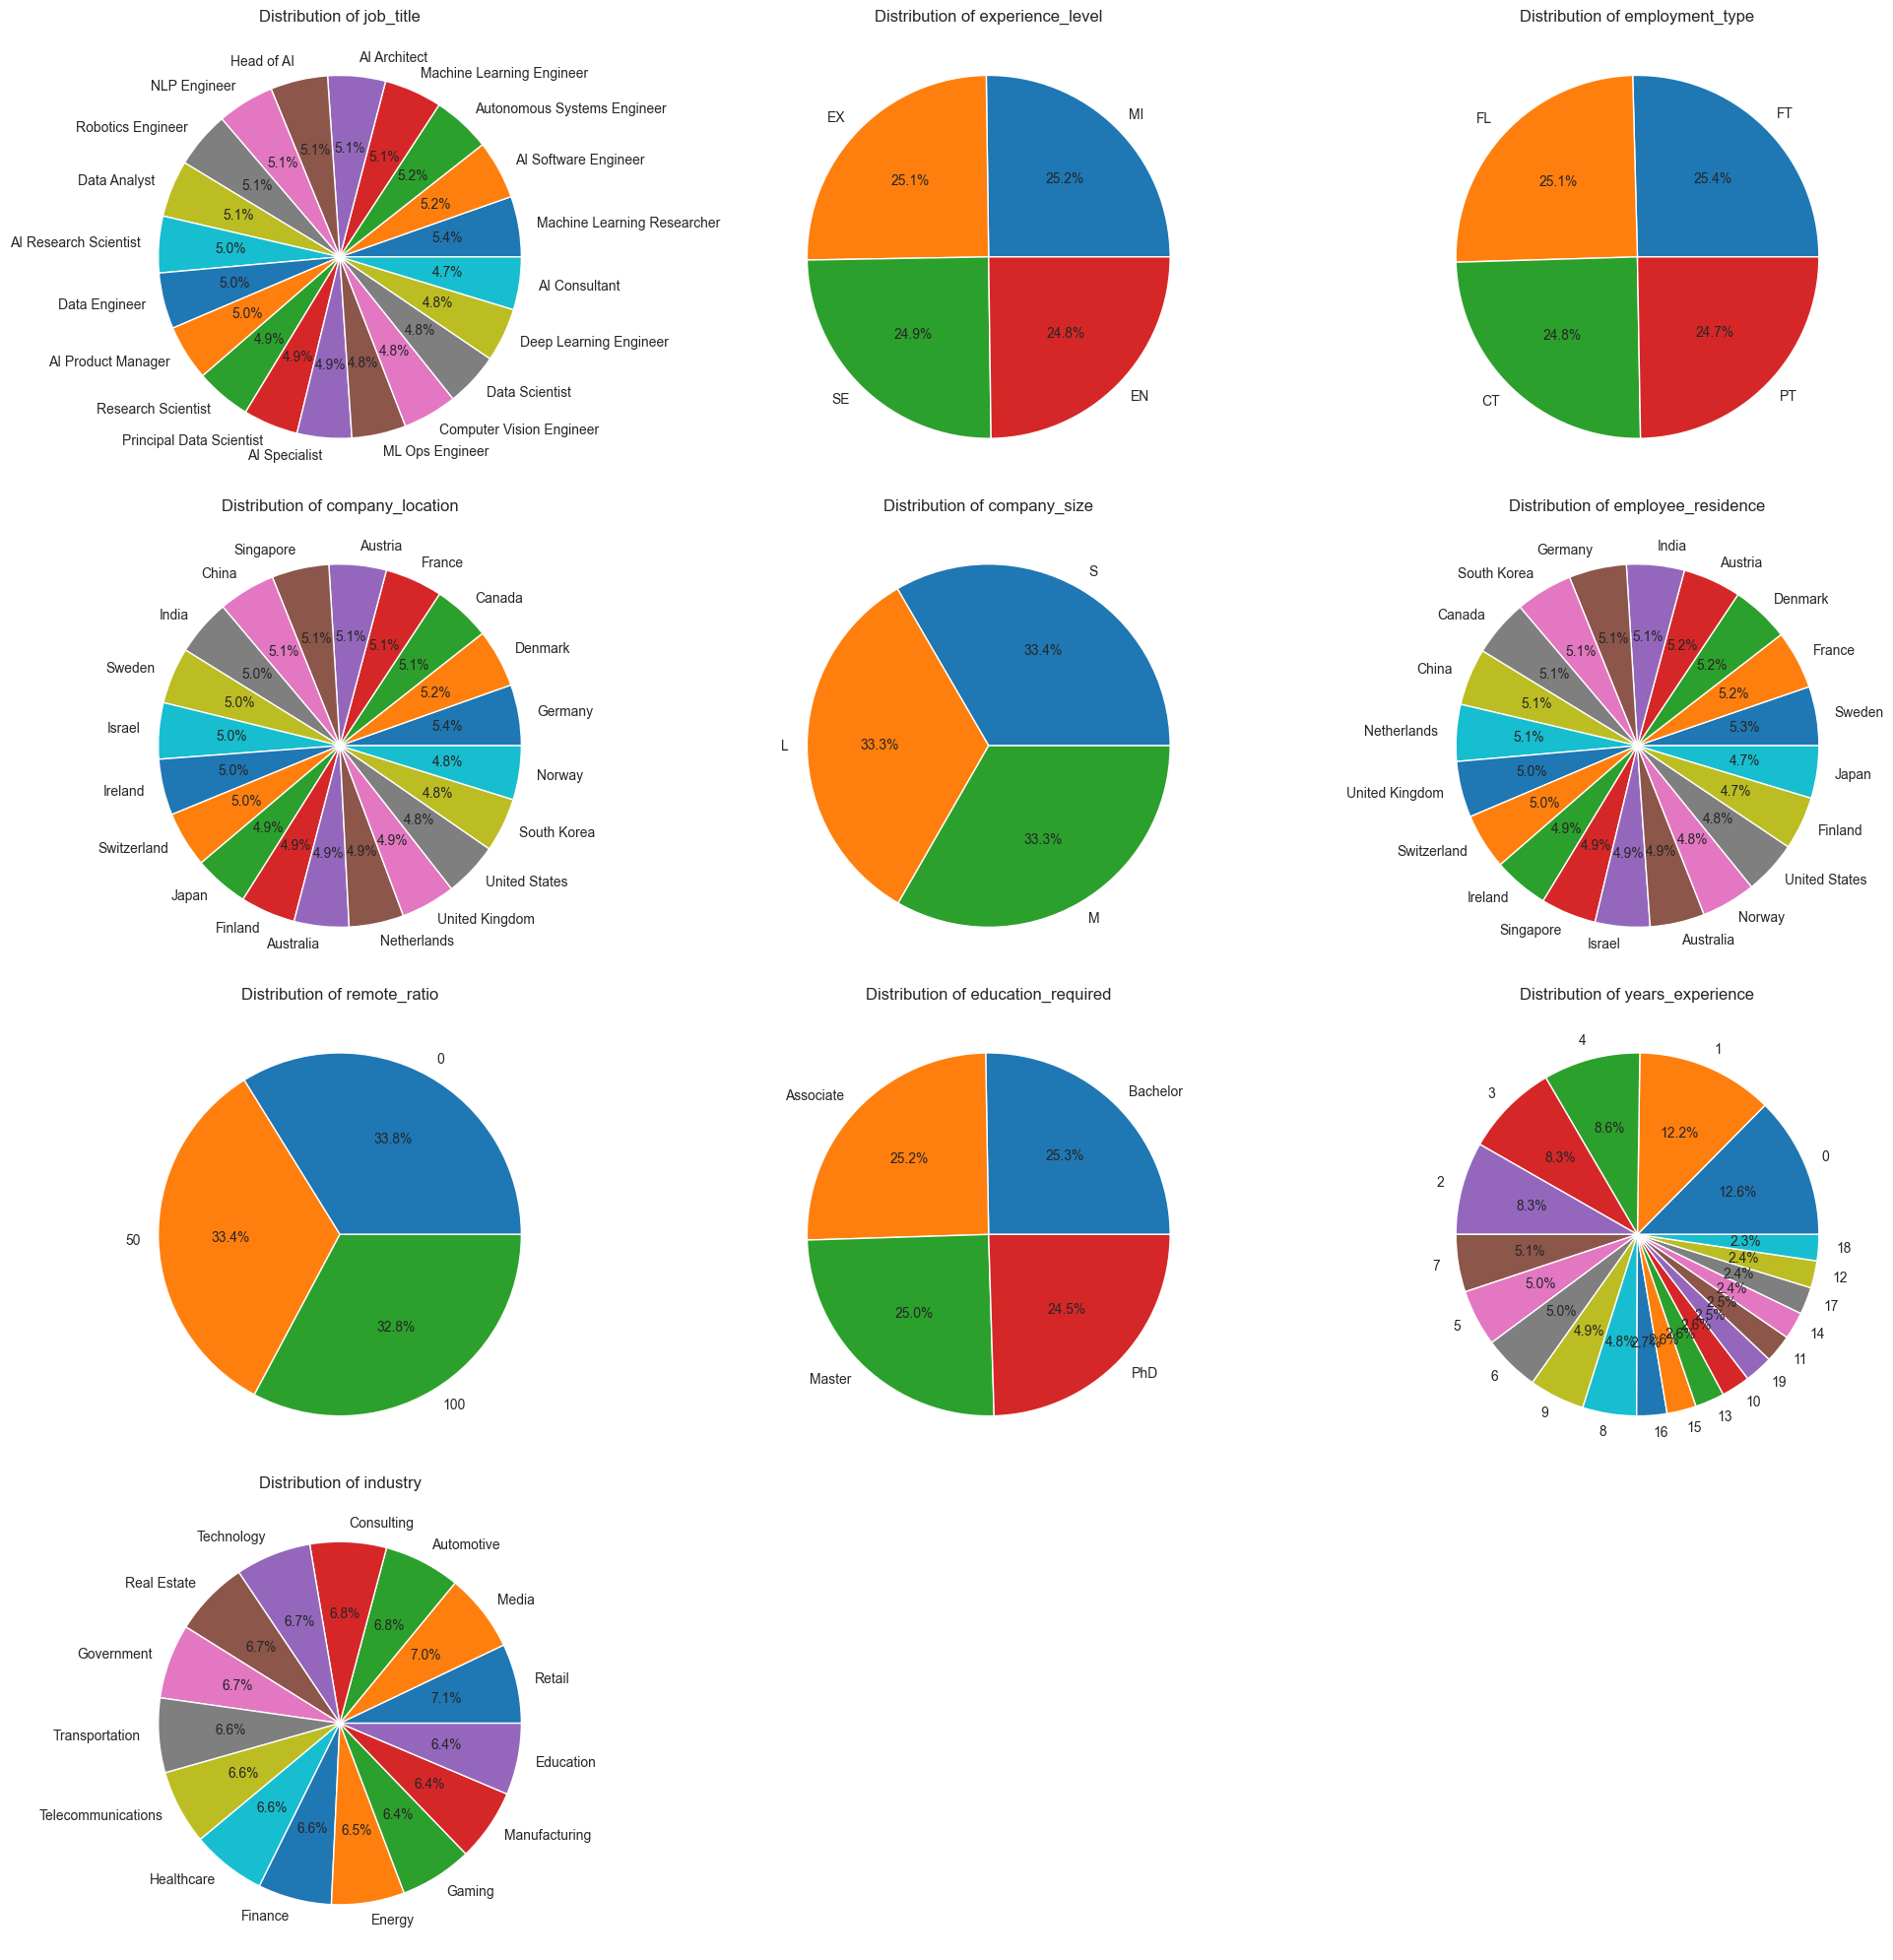

In [56]:
# checking if the data is balanced
features = [col for col in df.columns if col != 'salary_usd']
fig = plt.figure(figsize=(20, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    value_counts = df[feature].value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

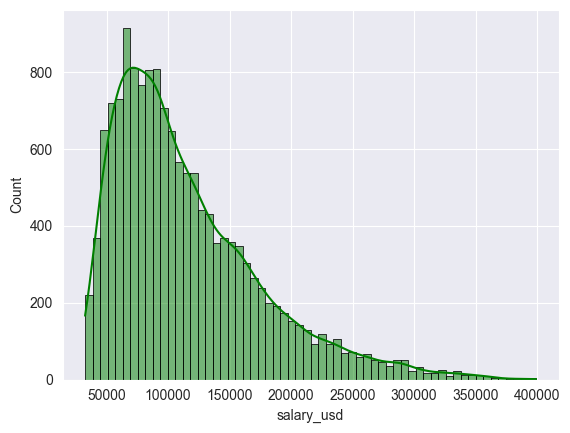

In [57]:
sns.histplot(df.salary_usd,kde=True, color= "Green", edgecolor= "black")
plt.show()

In [58]:
# since the salary_usd is right skewed I am using logarithms to make it more balanced
df['salary_usd']=np.log1p(df['salary_usd'])

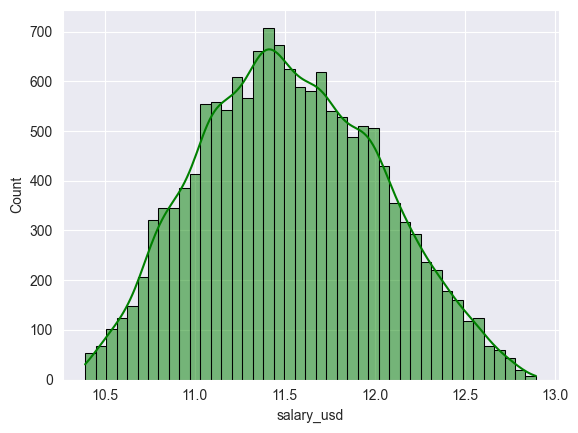

In [59]:
sns.histplot(df['salary_usd'],kde=True, color= "Green", edgecolor= "black")
plt.show()

### Preprocessing Data

In [60]:
from sklearn.preprocessing import OrdinalEncoder

In [61]:
encoder=OrdinalEncoder()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           15000 non-null  object 
 1   salary_usd          15000 non-null  float64
 2   experience_level    15000 non-null  object 
 3   employment_type     15000 non-null  object 
 4   company_location    15000 non-null  object 
 5   company_size        15000 non-null  object 
 6   employee_residence  15000 non-null  object 
 7   remote_ratio        15000 non-null  int64  
 8   education_required  15000 non-null  object 
 9   years_experience    15000 non-null  int64  
 10  industry            15000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB


In [63]:
df['experience_level'].value_counts()

experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

In [64]:
# manual mapping for experience
mapping={'EN':0, 'MI':2, 'SE':1, 'EX':3}
df['experience_level']=df['experience_level'].map(mapping)

In [65]:
df.columns

Index(['job_title', 'salary_usd', 'experience_level', 'employment_type',
       'company_location', 'company_size', 'employee_residence',
       'remote_ratio', 'education_required', 'years_experience', 'industry'],
      dtype='object')

In [66]:
df['job_title'].value_counts()

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

In [67]:
columns = df.select_dtypes(include='object').columns
df[columns] = encoder.fit_transform(df[columns])

In [68]:
df['job_title'].value_counts()

job_title
15.0    808
4.0     784
6.0     777
14.0    772
0.0     771
12.0    765
16.0    762
19.0    759
8.0     759
3.0     756
9.0     749
2.0     743
18.0    742
17.0    734
5.0     728
13.0    725
7.0     724
10.0    720
11.0    718
1.0     704
Name: count, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           15000 non-null  float64
 1   salary_usd          15000 non-null  float64
 2   experience_level    15000 non-null  int64  
 3   employment_type     15000 non-null  float64
 4   company_location    15000 non-null  float64
 5   company_size        15000 non-null  float64
 6   employee_residence  15000 non-null  float64
 7   remote_ratio        15000 non-null  int64  
 8   education_required  15000 non-null  float64
 9   years_experience    15000 non-null  int64  
 10  industry            15000 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 1.3 MB


### Advanced Model Training

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [71]:
X=df.drop(['salary_usd'],axis=1)
y=df['salary_usd']

In [72]:
X.head()

,job_title,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,industry
0,3.0,1,0.0,3.0,1.0,3.0,50,1.0,9,0.0
1,4.0,0,0.0,2.0,1.0,9.0,100,2.0,1,9.0
2,5.0,2,1.0,17.0,0.0,15.0,0,0.0,2,2.0
3,16.0,1,1.0,8.0,1.0,8.0,50,3.0,7,1.0
4,1.0,0,3.0,6.0,2.0,14.0,100,2.0,0,9.0


In [73]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

In [74]:
X.head()

,job_title,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,industry
0,-1.130279,-0.452700,-1.347217,-1.116670,-0.000735,-1.120847,0.012660,-0.43731,0.495313,-1.624758
1,-0.957020,-1.348189,-1.347217,-1.290608,-0.000735,-0.080403,1.237809,0.45894,-0.947276,0.454060
2,-0.783762,0.442790,-0.449431,1.318461,-1.225174,0.960041,-1.212489,-1.33356,-0.766953,-1.162798
3,1.122078,-0.452700,-0.449431,-0.246980,-0.000735,-0.253811,0.012660,1.35519,0.134666,-1.393778
4,-1.476795,-1.348189,1.346139,-0.594856,1.223704,0.786634,1.237809,0.45894,-1.127600,0.454060


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# # Hyperparameter tuning for Random Forest
# rf_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }
#
# # Hyperparameter tuning for XGBoost
# xgb_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }
#
# # Hyperparameter tuning for Gradient Boosting
# gb_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.6, 0.8, 1.0]
# }
#
# # Perform RandomizedSearchCV for each model
# rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42),
#                                param_distributions=rf_params,
#                                n_iter=20,
#                                cv=5,
#                                random_state=42,
#                                n_jobs=-1)
#
# xgb_random = RandomizedSearchCV(XGBRegressor(random_state=42),
#                                 param_distributions=xgb_params,
#                                 n_iter=20,
#                                 cv=5,
#                                 random_state=42,
#                                 n_jobs=-1)
#
# gb_random = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
#                                param_distributions=gb_params,
#                                n_iter=20,
#                                cv=5,
#                                random_state=42,
#                                n_jobs=-1)
#
# # Fit models
# rf_random.fit(X_train, y_train)
# xgb_random.fit(X_train, y_train)
# gb_random.fit(X_train, y_train)
#
# print("Best Random Forest parameters:", rf_random.best_params_)
# print("Best Random Forest score:", rf_random.best_score_)
#
# print("\nBest XGBoost parameters:", xgb_random.best_params_)
# print("Best XGBoost score:", xgb_random.best_score_)
#
# print("\nBest Gradient Boosting parameters:", gb_random.best_params_)
# print("Best Gradient Boosting score:", gb_random.best_score_)

In [77]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)
xgb = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, subsample=1.0, colsample_bytree=0.8, random_state=42)
gb = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, min_samples_split=2, min_samples_leaf=4, subsample=1.0, random_state=42)

In [78]:
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)
gb.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [79]:
pred_rf=rf.predict(X_test)
pred_xgb=xgb.predict(X_test)
pred_gb=gb.predict(X_test)

In [80]:
print("Random Forest R2 Score:",rf.score(X_test,y_test))
print("XGBoost R2 Score:", xgb.score(X_test,y_test))
print("Gradient Boosting R2 Score:",gb.score(X_test,y_test))

Random Forest R2 Score: 0.8839891540578169
XGBoost R2 Score: 0.9190427598930182
Gradient Boosting R2 Score: 0.9177510221020057


In [81]:
stack = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb), ('gb', gb)],
    final_estimator=LinearRegression()
)
stack.fit(X_train, y_train)

,estimators,"[('rf', ...), ('xgb', ...), ...]"
,final_estimator,LinearRegression()
,cv,None
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1


In [82]:
print("Stacking Regressor R2 Score:", stack.score(X_test, y_test))

Stacking Regressor R2 Score: 0.9191243840396062


In [ ]:
y_pred_log = stack.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

In [84]:
print("R2 Score of Stacking Regressor on Test Data:", r2_score(y_test_original, y_pred))
print("Root Mean Squared Error of Stacking Regressor on Test Data:", np.sqrt
(mean_squared_error(y_test_original, y_pred)))

R2 Score of Stacking Regressor on Test Data: 0.8879944908974841
Root Mean Squared Error of Stacking Regressor on Test Data: 20211.511651569905


In [85]:
print("Target variable statistics:")
print(f"Mean: {y.mean():.4f}")
print(f"Std: {y.std():.4f}")
print(f"Min: {y.min():.4f}")
print(f"Max: {y.max():.4f}")

Target variable statistics:
Mean: 11.5316
Std: 0.4956
Min: 10.3896
Max: 12.8970


In [93]:
# Create a sample data point
sample_data = pd.DataFrame({
    'job_title': [5],  # Using encoded value
    'experience_level': [0],  # MI level
    'employment_type': [0],  # Using encoded value 
    'company_location': [0],  # Using encoded value
    'company_size': [0],  # Using encoded value
    'employee_residence': [0],  # Using encoded value
    'remote_ratio': [0],
    'education_required': [0],  # Using encoded value
    'years_experience': [5],
    'industry': [0]  # Using encoded value
})

# Scale the sample data and keep it as DataFrame with column names
sample_scaled = scaler.transform(sample_data)
sample_scaled_df = pd.DataFrame(sample_scaled, columns=X.columns)

# Make prediction
prediction_log = stack.predict(sample_scaled_df)
prediction_usd = np.expm1(prediction_log)

print(f"Predicted salary: ${prediction_usd[0]:,.2f}")


Predicted salary: $126,511.23


In [94]:
# Test multiple different inputs with proper DataFrame structure
test_samples = [
    [1, 0, 0, 0, 1, 0, 0, 0, 2, 0],  # Sample 1
    [5, 3, 1, 2, 2, 1, 100, 1, 10, 1],  # Sample 2
    [10, 1, 0, 1, 0, 0, 50, 0, 7, 2],  # Sample 3
]

for i, sample in enumerate(test_samples):
    sample_df = pd.DataFrame([sample], columns=X.columns)
    sample_scaled = scaler.transform(sample_df)
    sample_scaled_df = pd.DataFrame(sample_scaled, columns=X.columns)
    prediction_log = stack.predict(sample_scaled_df)
    prediction_usd = np.expm1(prediction_log)
    print(f"Sample {i+1} prediction: ${prediction_usd[0]:,.2f}")

Sample 1 prediction: $68,097.17
Sample 2 prediction: $161,301.90
Sample 3 prediction: $108,003.93


### Exporting Best Model

In [95]:
from joblib import dump

# Save the model and scaler
dump(stack, './models/salary_prediction_model.pkl')
dump(scaler, './models/scaler.pkl')

['./models/scaler.pkl']

Two files will be created:
1. `salary_prediction_model.pkl` - contains the trained stacking regressor model
2. `scaler.pkl` - contains the fitted StandardScaler object needed for preprocessing new data